# Thomas Kiely
_17185203_

## Task 2
Replicate the classifier training and evaluation demonstrated in the example notebook Lab 4 - Comparison of Binary Classifiers.ipynb but with the dataset seeds.csv. You will need to formulate a binary classification problem and transform the type column accordingly.

## Task 3
Train a third probabilistic classifier (e.g., MLPClassifier, Naive Bayes, kNN) with seeds.csv add compare it to both SVM and Random Fores

In [383]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support
from scipy import interp
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [384]:
df = pd.read_csv("./seeds.csv")
df.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [385]:
df['type'].value_counts()

3    70
2    70
1    70
Name: type, dtype: int64

In [386]:
df.describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [387]:
df.loc[df['type'] == 1].describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,14.334429,14.294286,0.880070,5.508057,3.244629,2.667403,5.087214,1.0
std,1.215704,0.576583,0.016191,0.231508,0.177616,1.173901,0.263699,0.0
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000,1.0
25%,13.750000,13.960000,0.868850,5.384500,3.134250,1.826500,4.924500,1.0
50%,14.355000,14.320000,0.880500,5.534000,3.243500,2.545500,5.094000,1.0
75%,15.045000,14.732500,0.890400,5.677000,3.378500,3.301000,5.223500,1.0
max,17.080000,15.460000,0.918300,6.053000,3.683000,6.685000,5.877000,1.0


In [388]:
df.loc[df['type'] == 2].describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,18.334286,16.135714,0.883517,6.148029,3.677414,3.644800,6.020600,2.0
std,1.439496,0.616995,0.015500,0.268191,0.185539,1.181868,0.253934,0.0
min,15.380000,14.660000,0.845200,5.363000,3.231000,1.472000,5.144000,2.0
25%,17.330000,15.737500,0.872525,5.979250,3.554250,2.845500,5.877500,2.0
50%,18.720000,16.210000,0.882600,6.148500,3.693500,3.609500,5.981500,2.0
75%,19.137500,16.557500,0.898225,6.312000,3.804750,4.436000,6.187750,2.0
max,21.180000,17.250000,0.910800,6.675000,4.033000,6.682000,6.550000,2.0


In [389]:
df.loc[df['type'] == 3].describe()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,type
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.0
mean,11.873857,13.247857,0.849409,5.229514,2.853771,4.788400,5.116400,3.0
std,0.723004,0.340196,0.021760,0.138015,0.147516,1.336465,0.162068,0.0
min,10.590000,12.410000,0.808100,4.899000,2.630000,1.661000,4.745000,3.0
25%,11.262500,13.002500,0.834000,5.136250,2.725500,4.048750,5.002000,3.0
50%,11.835000,13.250000,0.849350,5.224000,2.834500,4.839000,5.091500,3.0
75%,12.425000,13.470000,0.861825,5.323750,2.967000,5.467250,5.228500,3.0
max,13.370000,13.950000,0.897700,5.541000,3.232000,8.456000,5.491000,3.0


From the mean values in the above tables we can make some observations

- `

In [390]:
df.isna().sum()

area                       0
perimeter                  0
compactness                0
length of kernel           0
width of kernel            0
asymmetry coefficient      0
length of kernel groove    0
type                       0
dtype: int64

Using `df.isna().sum()` we can see that there are no missing values

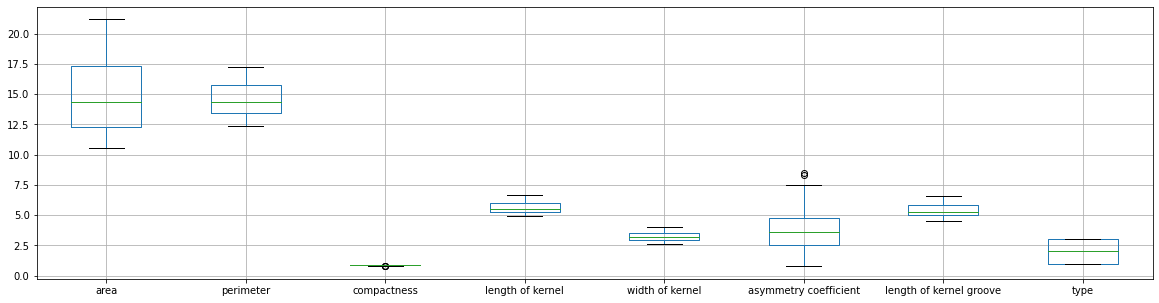

In [391]:
df.loc[:].boxplot(figsize=(20,5))
plt.show()

From the above boxplot we can make some observations

- The `compactness` and `asymmetry coefficient` columns contain the most obvious outliers




## Data Preparation

Currently, this dataset is not prepared for a binary classification problem. To make the dataset more suitable, we must transform the dataset based on the classification `type` variable.

In this dataset, we will transform seeds of `type` 1 and 2 to a new `type` value 0. `type` 1 will stay the same to ensure the dataset is suitable for this binary classification.

In [392]:
mapper = {1:1, 2:0, 3:0}
df['type'] = df['type'].replace(mapper)
df['type'].value_counts()

0    140
1     70
Name: type, dtype: int64

In [393]:
# store a list with the names of all predictors
names_all = [c for c in df if c not in ['type']]

# define column groups with same data preparation
names_outliers = ['compactness','asymmetry coefficient']
names_no_outliers = list(set(names_all) - set(names_outliers))

We create two lists, one containing the outliers and the other containing the remaining data.
A robust scaler and a log function will be applied to the data in the outlier column.
A standard scaler will be applied to the other list.

In [394]:
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [395]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

In [396]:
preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_no_outliers),
            StandardScaler()
        ))
    ])
)

In [397]:
y = df['type']
X = df.drop('type', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

We split  the x and y dataframes into training and test sets using an 80/20 split. We also shuffle the dataset since all of the 1's follow each other but we use stratify so that the amount of both classes remain proportionate in both the test and training sets

## Grid Search for Best Parameters of Classifiers

#### SVM

In [398]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('svm', svm.SVC(probability=True))])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of svn.SVC and their possible values

param_grid = {
    'svm__C': [0.1, 1, 10, 100],  
    'svm__gamma': [1, 0.1, 0.01, 0.001], 
    'svm__kernel': ['rbf', 'linear', 'poly']}

search = GridSearchCV(pipe, param_grid, cv=10, iid=False, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
SVM_best_params = search.best_params_
SVM_best_model = search.best_estimator_

Best CV score = 0.958:
Best parameters:  {'svm__C': 100, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}


/home/tom/CS4337/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


We trained our SVM classifier with the training set. We use grid search to find the best parameters which will produce the best score for the classifier. We create another pipeline which combines the preprocessing pipeline and the SVM classifier.

The best parameters were in this run were: 

C = 100: C is the regularization parameter.
Gamma = 0.01: Gamma is the kernel coefficient
Kernel = rbf: Kernel specifies the kernel type to be used in the algorithm.

#### Random Forest

In [399]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), ('rf', RandomForestClassifier())])

# prepare a prameter grid
# note that __ can be used to specify the name of a parameter for a specific element in a pipeline
# note also that this is not an exhaustive list of the parameters of RandomForestClassifier and their possible values
param_grid = {
    'rf__n_estimators' : [10,20,30],
    'rf__max_depth': [2, 4, 6, 8]
}

search = GridSearchCV(pipe, param_grid, cv=10, iid=False, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
RF_best_params = search.best_params_
RF_best_model = search.best_estimator_

Best CV score = 0.953:
Best parameters:  {'rf__max_depth': 6, 'rf__n_estimators': 20}


/home/tom/CS4337/lib/python3.6/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


We then train the Random Forest classifier with the training set. We use grid search to find the best parameters which will produce the best score for the classifier. We create another pipeline which combines the preprocessing pipeline and the Random Forest classifier.

The best parameters found during this run were:
- N_estimators = 20: This is the number of trees in the forest
- Max_depth = 6: This specifies the maximum depth of the tree

## Task 3

For this task I will apply the kNN classifier approach and compare the results of this method against the SVM and random forest approaches used above

In [400]:
# create the pipeline
pipe = Pipeline(steps=[('preprocess', preprocess_pipeline),
                       ('kn', KNeighborsClassifier())])

# prepare a prameter grid
param_grid = {
 'kn__n_neighbors': [3,4,5,6], 
 'kn__weights': ['uniform','distance'],
 'kn__metric': ['euclidean','manhattan'], 
}

search = GridSearchCV(pipe, param_grid, cv=10, refit=True)
search.fit(X_train, y_train)
print("Best CV score = %0.3f:" % search.best_score_)
print("Best parameters: ", search.best_params_)

# store the best params and best model for later use
KN_best_params = search.best_params_
KN_best_model = search.best_estimator_

Best CV score = 0.946:
Best parameters:  {'kn__metric': 'manhattan', 'kn__n_neighbors': 4, 'kn__weights': 'distance'}


We train our KNN classifier with the training set. We use grid search to find the best parameters which will produce the best score for the classifier. We create another pipeline which combines the preprocessing pipeline and the KNN classifier.

The best parameters were:

kn_metric = manhattan: the distance metric to use for the tree
N_neighbors = 4: This is the number of neighbours to use i.e. K
Weights = distance: This is the weight function to be used in prediction.

## Compare Classifiers on Test Set

In [401]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

In [402]:
# model - a trained binary probabilistic classification model;
#         it is assumed that there are two classes: 0 and 1
#         and the classifier learns to predict probabilities for the examples to belong to class 1

def evaluate_model(X_test, y_test, model):
    # compute probabilistic predictiond for the evaluation set
    _probabilities = model.predict_proba(X_test)[:, 1]

    # compute exact predictiond for the evaluation set
    _predicted_values = model.predict(X_test)

    # compute accuracy
    _accuracy = accuracy_score(y_test, _predicted_values)

    # compute precision, recall and f1 score for class 1
    _precision, _recall, _f1_score, _ = precision_recall_fscore_support(
        y_test, _predicted_values, labels=[1])

    # compute fpr and tpr values for various thresholds
    # by comparing the true target values to the predicted probabilities for class 1
    _fpr, _tpr, _ = roc_curve(y_test, _probabilities)

    # compute true positive rates for the values in the array mean_fpr
    _tpr_transformed = np.array([interp(mean_fpr, _fpr, _tpr)])

    # compute the area under the curve
    _auc = auc(_fpr, _tpr)

    return _accuracy, _precision[0], _recall[0], _f1_score[0], _tpr_transformed, _auc

In [403]:
SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score, SVM_tpr, SVM_auc = evaluate_model(
    X_test, y_test, SVM_best_model)
RF_accuracy, RF_precision, RF_recall, RF_f1_score, RF_tpr, RF_auc = evaluate_model(
    X_test, y_test, RF_best_model)
KN_accuracy, KN_precision, KN_recall, KN_f1_score, KN_tpr, KN_auc = evaluate_model(
    X_test, y_test, KN_best_model) 

/home/tom/CS4337/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/home/tom/CS4337/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
/home/tom/CS4337/lib/python3.6/site-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


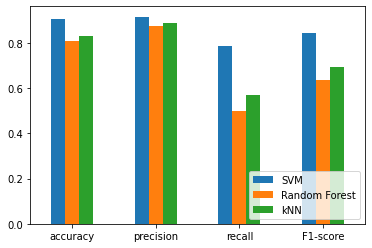

In [404]:
SVM_metrics = np.array([SVM_accuracy, SVM_precision, SVM_recall, SVM_f1_score])
RF_metrics = np.array([RF_accuracy, RF_precision, RF_recall, RF_f1_score])
KN_metrics = np.array([KN_accuracy, KN_precision, KN_recall, KN_f1_score])
index = ['accuracy', 'precision', 'recall', 'F1-score']
df_metrics = pd.DataFrame(
    {'SVM': SVM_metrics, 'Random Forest': RF_metrics, "kNN": KN_metrics}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

In [ ]:
The metrics used to compare the classifier approaches were
- accuracy
- precision
- recall
- F1-Score

From these metrics we can see that:
- SVM performed best across all metrics
- Random Forest ah

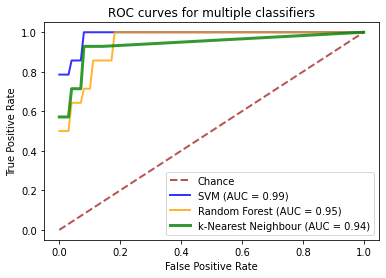

In [405]:
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='brown', label='Chance', alpha=0.8)
plt.plot(mean_fpr, SVM_tpr[0,:], lw=2, color='blue', label='SVM (AUC = %0.2f)' % (SVM_auc), alpha=0.8)
plt.plot(mean_fpr, RF_tpr[0,:], lw=2, color='orange', label='Random Forest (AUC = %0.2f)' % (RF_auc), alpha=0.8)
plt.plot(mean_fpr, KN_tpr[0,:], lw=3, color='green', label='k-Nearest Neighbour (AUC = %0.2f)' % (KN_auc), alpha=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for multiple classifiers')
plt.legend(loc="lower right")
plt.show()

The ROC curves confirm that all classifiers perform significantly better than a random guess (the red dashed line). 

From this graph we can see that SVM clearly outperforms the other classifiers and has the largest AUC. \
Both Random Forest and kNN achieve a similar AUC value, with Random Forest achieving slightly higher. \
From this graph, and the previous chart plotting the performance metrics of the classifiers, it is clear that SVM is the best performing classifier while both Random Forest and kNN perform worse, with kNN achieving the lowest AUC value.

## Train a Final Model

In [382]:
# function to remove the string 'svm__' from the names of the parameters in SVM_best_params
def transform(dict):
    return {key.replace('svm__','') :  value for key, value in dict.items()}

pipe = make_pipeline(preprocess_pipeline, svm.SVC(**transform(SVM_best_params)))

final_model =pipe.fit(X, y)

In [241]:
filename = 'final_model.sav'
pickle.dump(final_model, open(filename, 'wb'))